In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [71]:
class NeuralNetwork(nn.Module):
    def __init__ (self,input_size,hidden_size,num_classes):
        super(NeuralNetwork,self).__init__()
        self.l1 = nn.Linear(input_size,hidden_size)
        self.relu1 = nn.ReLU6()
        self.bn1 = nn.BatchNorm1d(hidden_size)
        self.sig1 = nn.Sigmoid()
        self.relu2 = nn.ReLU6()
        self.sig2 = nn.Sigmoid()
        self.relu3 = nn.ReLU6()
        self.sig3 = nn.Sequential()
        self.relu4 = nn.ReLU6()
        self.l2 = nn.Linear(hidden_size,num_classes)
    def forward(self,x):
        x = self.l1(x)
        x = self.relu1(x)
        x = self.bn1(x)
        x = self.sig1(x) 
        x = self.relu2(x)
        x = self.sig2(x)
        x = self.relu3(x)
        x = self.sig3(x)
        x = self.relu4(x)
        x = self.l2(x)
        return x

In [72]:
df = pd.read_csv('/Users/hari/Downloads/Maternal Health Risk Data Set.csv.xls')
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [73]:
risk_level_map = {'high risk':2,'mid risk':1,'low risk':0}
df['RiskLevel'] = df['RiskLevel'].map(risk_level_map)

In [74]:
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,2
1,35,140,90,13.0,98.0,70,2
2,29,90,70,8.0,100.0,80,2
3,30,140,85,7.0,98.0,70,2
4,35,120,60,6.1,98.0,76,0
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,2
1010,55,120,90,18.0,98.0,60,2
1011,35,85,60,19.0,98.0,86,2
1012,43,120,90,18.0,98.0,70,2


In [75]:
train_data , test_data = train_test_split(df,random_state=42,shuffle=True,test_size=0.3)

In [76]:
train_data

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
177,54,140,100,15.0,98.0,66,2
467,50,140,90,15.0,98.0,90,2
507,18,120,80,7.9,102.0,76,1
486,38,135,60,7.9,101.0,86,2
328,35,90,70,6.9,98.0,70,0
...,...,...,...,...,...,...,...
106,50,140,90,15.0,98.0,90,2
270,22,120,90,7.0,98.0,82,0
860,17,90,63,6.9,101.0,70,1
435,65,130,80,15.0,98.0,86,2


In [77]:
test_data

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
752,29,130,70,7.7,98.0,78,1
519,30,140,100,15.0,98.0,70,2
210,50,140,95,17.0,98.0,60,2
611,23,120,90,7.5,98.0,60,0
914,17,120,80,7.5,102.0,76,0
...,...,...,...,...,...,...,...
1003,50,130,100,16.0,98.0,76,2
227,29,120,75,7.2,100.0,70,2
868,50,140,80,6.7,98.0,70,1
584,32,140,90,18.0,98.0,88,2


In [78]:
X_train = train_data.drop(columns=['RiskLevel'])
y_train = train_data['RiskLevel']

In [79]:
X_test = test_data.drop(columns=['RiskLevel'])
y_test = test_data['RiskLevel']

In [80]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [81]:
X_train = torch.tensor(X_train,dtype=torch.float32)
X_test = torch.tensor(X_test,dtype=torch.float32)

In [82]:
y_train = torch.tensor(np.array(y_train),dtype=torch.long)
y_test = torch.tensor(np.array(y_test),dtype=torch.long)

In [88]:
input_size = X_train.shape[1]
hidden_size = 2048
num_classes = len(np.unique(y_train))

In [89]:
model = NeuralNetwork(input_size,hidden_size,num_classes)
optimizer = torch.optim.Adamax(model.parameters(),lr=0.001)
criterion = nn.CrossEntropyLoss()

Learning Rate = 0.001 we can change it to 0.0001 if we need to improve

In [90]:
num_epochs = 20000
for epoch in range (num_epochs):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs,y_train)
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 1000 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [1000/20000], Loss: 0.6095
Epoch [2000/20000], Loss: 0.4638
Epoch [3000/20000], Loss: 0.3149
Epoch [4000/20000], Loss: 0.2082
Epoch [5000/20000], Loss: 0.1619
Epoch [6000/20000], Loss: 0.1412
Epoch [7000/20000], Loss: 0.1308
Epoch [8000/20000], Loss: 0.1242
Epoch [9000/20000], Loss: 0.1197
Epoch [10000/20000], Loss: 0.1166
Epoch [11000/20000], Loss: 0.1144
Epoch [12000/20000], Loss: 0.1127
Epoch [13000/20000], Loss: 0.1115
Epoch [14000/20000], Loss: 0.1106
Epoch [15000/20000], Loss: 0.1100
Epoch [16000/20000], Loss: 0.1094
Epoch [17000/20000], Loss: 0.1090
Epoch [18000/20000], Loss: 0.1087
Epoch [19000/20000], Loss: 0.1084
Epoch [20000/20000], Loss: 0.1081


In [91]:
with torch.no_grad():
    test_outputs = model(X_test)
    _, predicted = torch.max(test_outputs, 1)
    accuracy = (predicted == y_test).sum().item() / y_test.size(0)
    print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 81.31%


In [92]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

with torch.no_grad():
    test_outputs = model(X_test)  
    _, predicted = torch.max(test_outputs, 1)  

y_true = y_test.cpu().numpy()   
y_pred = predicted.cpu().numpy() 


precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

print(classification_report(y_true, y_pred))

Precision: 0.8127
Recall: 0.8131
F1 Score: 0.8117
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       117
           1       0.81      0.73      0.77       112
           2       0.85      0.92      0.89        76

    accuracy                           0.81       305
   macro avg       0.82      0.82      0.82       305
weighted avg       0.81      0.81      0.81       305



In [64]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [65]:
with torch.no_grad():
    test_outputs = model(X_test)  
    probabilities = torch.softmax(test_outputs, dim=1)  

y_true = y_test.cpu().numpy()  
y_prob = probabilities.cpu().numpy()

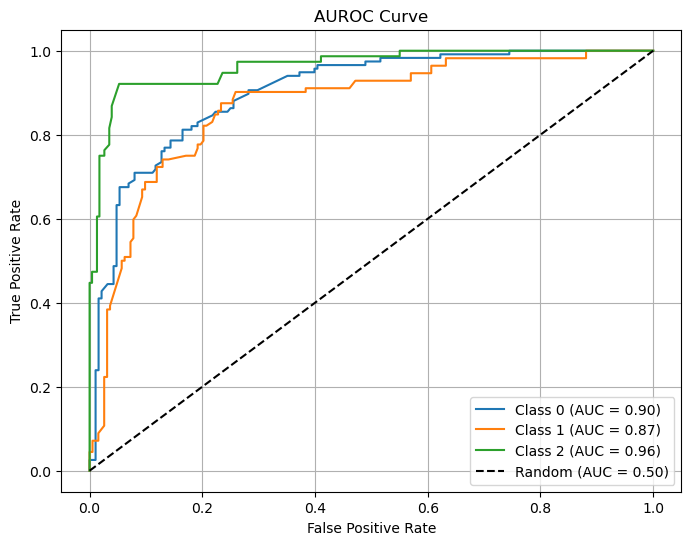

In [66]:
n_classes = y_prob.shape[1]  # Number of classes
y_true_bin = label_binarize(y_true, classes=np.arange(n_classes))

fpr = {}  # False Positive Rate
tpr = {}  # True Positive Rate
roc_auc = {}  # AUC scores

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot random classifier line
plt.plot([0, 1], [0, 1], 'k--', label="Random (AUC = 0.50)")

# Formatting the plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [67]:
macro_auroc = roc_auc_score(y_true_bin, y_prob, average="macro")
weighted_auroc = roc_auc_score(y_true_bin, y_prob, average="weighted")

print(f"Macro AUROC: {macro_auroc:.4f}")
print(f"Weighted AUROC: {weighted_auroc:.4f}")

Macro AUROC: 0.9120
Weighted AUROC: 0.9058


In [68]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report

precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
auroc = roc_auc_score(y_true_bin, y_prob, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUROC: {auroc:.4f}")

print(classification_report(y_true, y_pred))


Precision: 0.7918
Recall: 0.7934
F1 Score: 0.7920
AUROC: 0.9058
              precision    recall  f1-score   support

           0       0.77      0.78      0.77       117
           1       0.77      0.72      0.75       112
           2       0.85      0.92      0.89        76

    accuracy                           0.79       305
   macro avg       0.80      0.81      0.80       305
weighted avg       0.79      0.79      0.79       305

